In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\91994\\Documents\\Preeti Files\\Sundaram ML\\Logistics Regression'

In [3]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.shape

(891, 15)

# Preprocrssing Steps
### Checking Missing Value

In [5]:
data.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [6]:
# Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
age_median = (data.age.median())

<AxesSubplot:ylabel='age'>

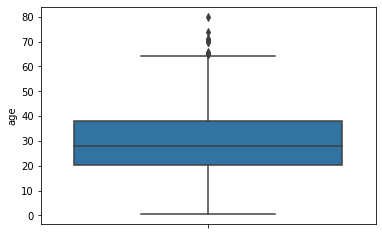

In [8]:
sns.boxplot(y= data.age, data = data)

In [9]:
data.age = data.age.fillna(age_median)

In [10]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
data = data.drop(columns ='deck', axis =1 )

In [12]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [13]:
data.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [14]:
data.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [15]:
data.embarked = data.embarked.fillna('S')

In [16]:
data.embark_town = data.embark_town.fillna('Southampton')

In [17]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
data = data.drop(columns = 'embark_town', axis =1)

In [19]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [20]:
data = data.drop(columns = 'alive', axis =1)

In [21]:
data.describe(include='object')

,sex,embarked,who
count,891,891,891
unique,2,3,3
top,male,S,man
freq,577,646,537


In [22]:
data.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [23]:
data['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [24]:
data = data.drop(columns = 'pclass', axis =1)

In [25]:
data = data.drop(columns = 'alone', axis =1)

In [26]:
data = data.drop(columns = ['adult_male', 'who'], axis =1)

In [27]:
data

,survived,sex,age,sibsp,parch,fare,embarked,class
0,0,male,22.0,1,0,7.2500,S,Third
1,1,female,38.0,1,0,71.2833,C,First
2,1,female,26.0,0,0,7.9250,S,Third
3,1,female,35.0,1,0,53.1000,S,First
4,0,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second
887,1,female,19.0,0,0,30.0000,S,First
888,0,female,28.0,1,2,23.4500,S,Third
889,1,male,26.0,0,0,30.0000,C,First


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   fare      891 non-null    float64 
 6   embarked  891 non-null    object  
 7   class     891 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 49.9+ KB


In [29]:
data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].cat.codes

In [30]:
data['embarked'] = data['embarked'].astype('category')
data['embarked'] = data['embarked'].cat.codes

In [31]:
data = pd.get_dummies(data, columns = ['embarked'])

In [32]:
data

,survived,sex,age,sibsp,parch,fare,class,embarked_0,embarked_1,embarked_2
0,0,1,22.0,1,0,7.2500,Third,0,0,1
1,1,0,38.0,1,0,71.2833,First,1,0,0
2,1,0,26.0,0,0,7.9250,Third,0,0,1
3,1,0,35.0,1,0,53.1000,First,0,0,1
4,0,1,35.0,0,0,8.0500,Third,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,Second,0,0,1
887,1,0,19.0,0,0,30.0000,First,0,0,1
888,0,0,28.0,1,2,23.4500,Third,0,0,1
889,1,1,26.0,0,0,30.0000,First,1,0,0


In [33]:
data['class'] = data['class'].astype('category')
data['class'] = data['class'].cat.codes

In [34]:
data = pd.get_dummies(data, columns = ['class'])

In [35]:
data.head()

,survived,sex,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,class_0,class_1,class_2
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [36]:
# Outliers is non -significant activity in logistics regression due to sigmoid function
# feature scaling is not required as mots of the data is in binary format

In [37]:
# Checking class_imbalance
data.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

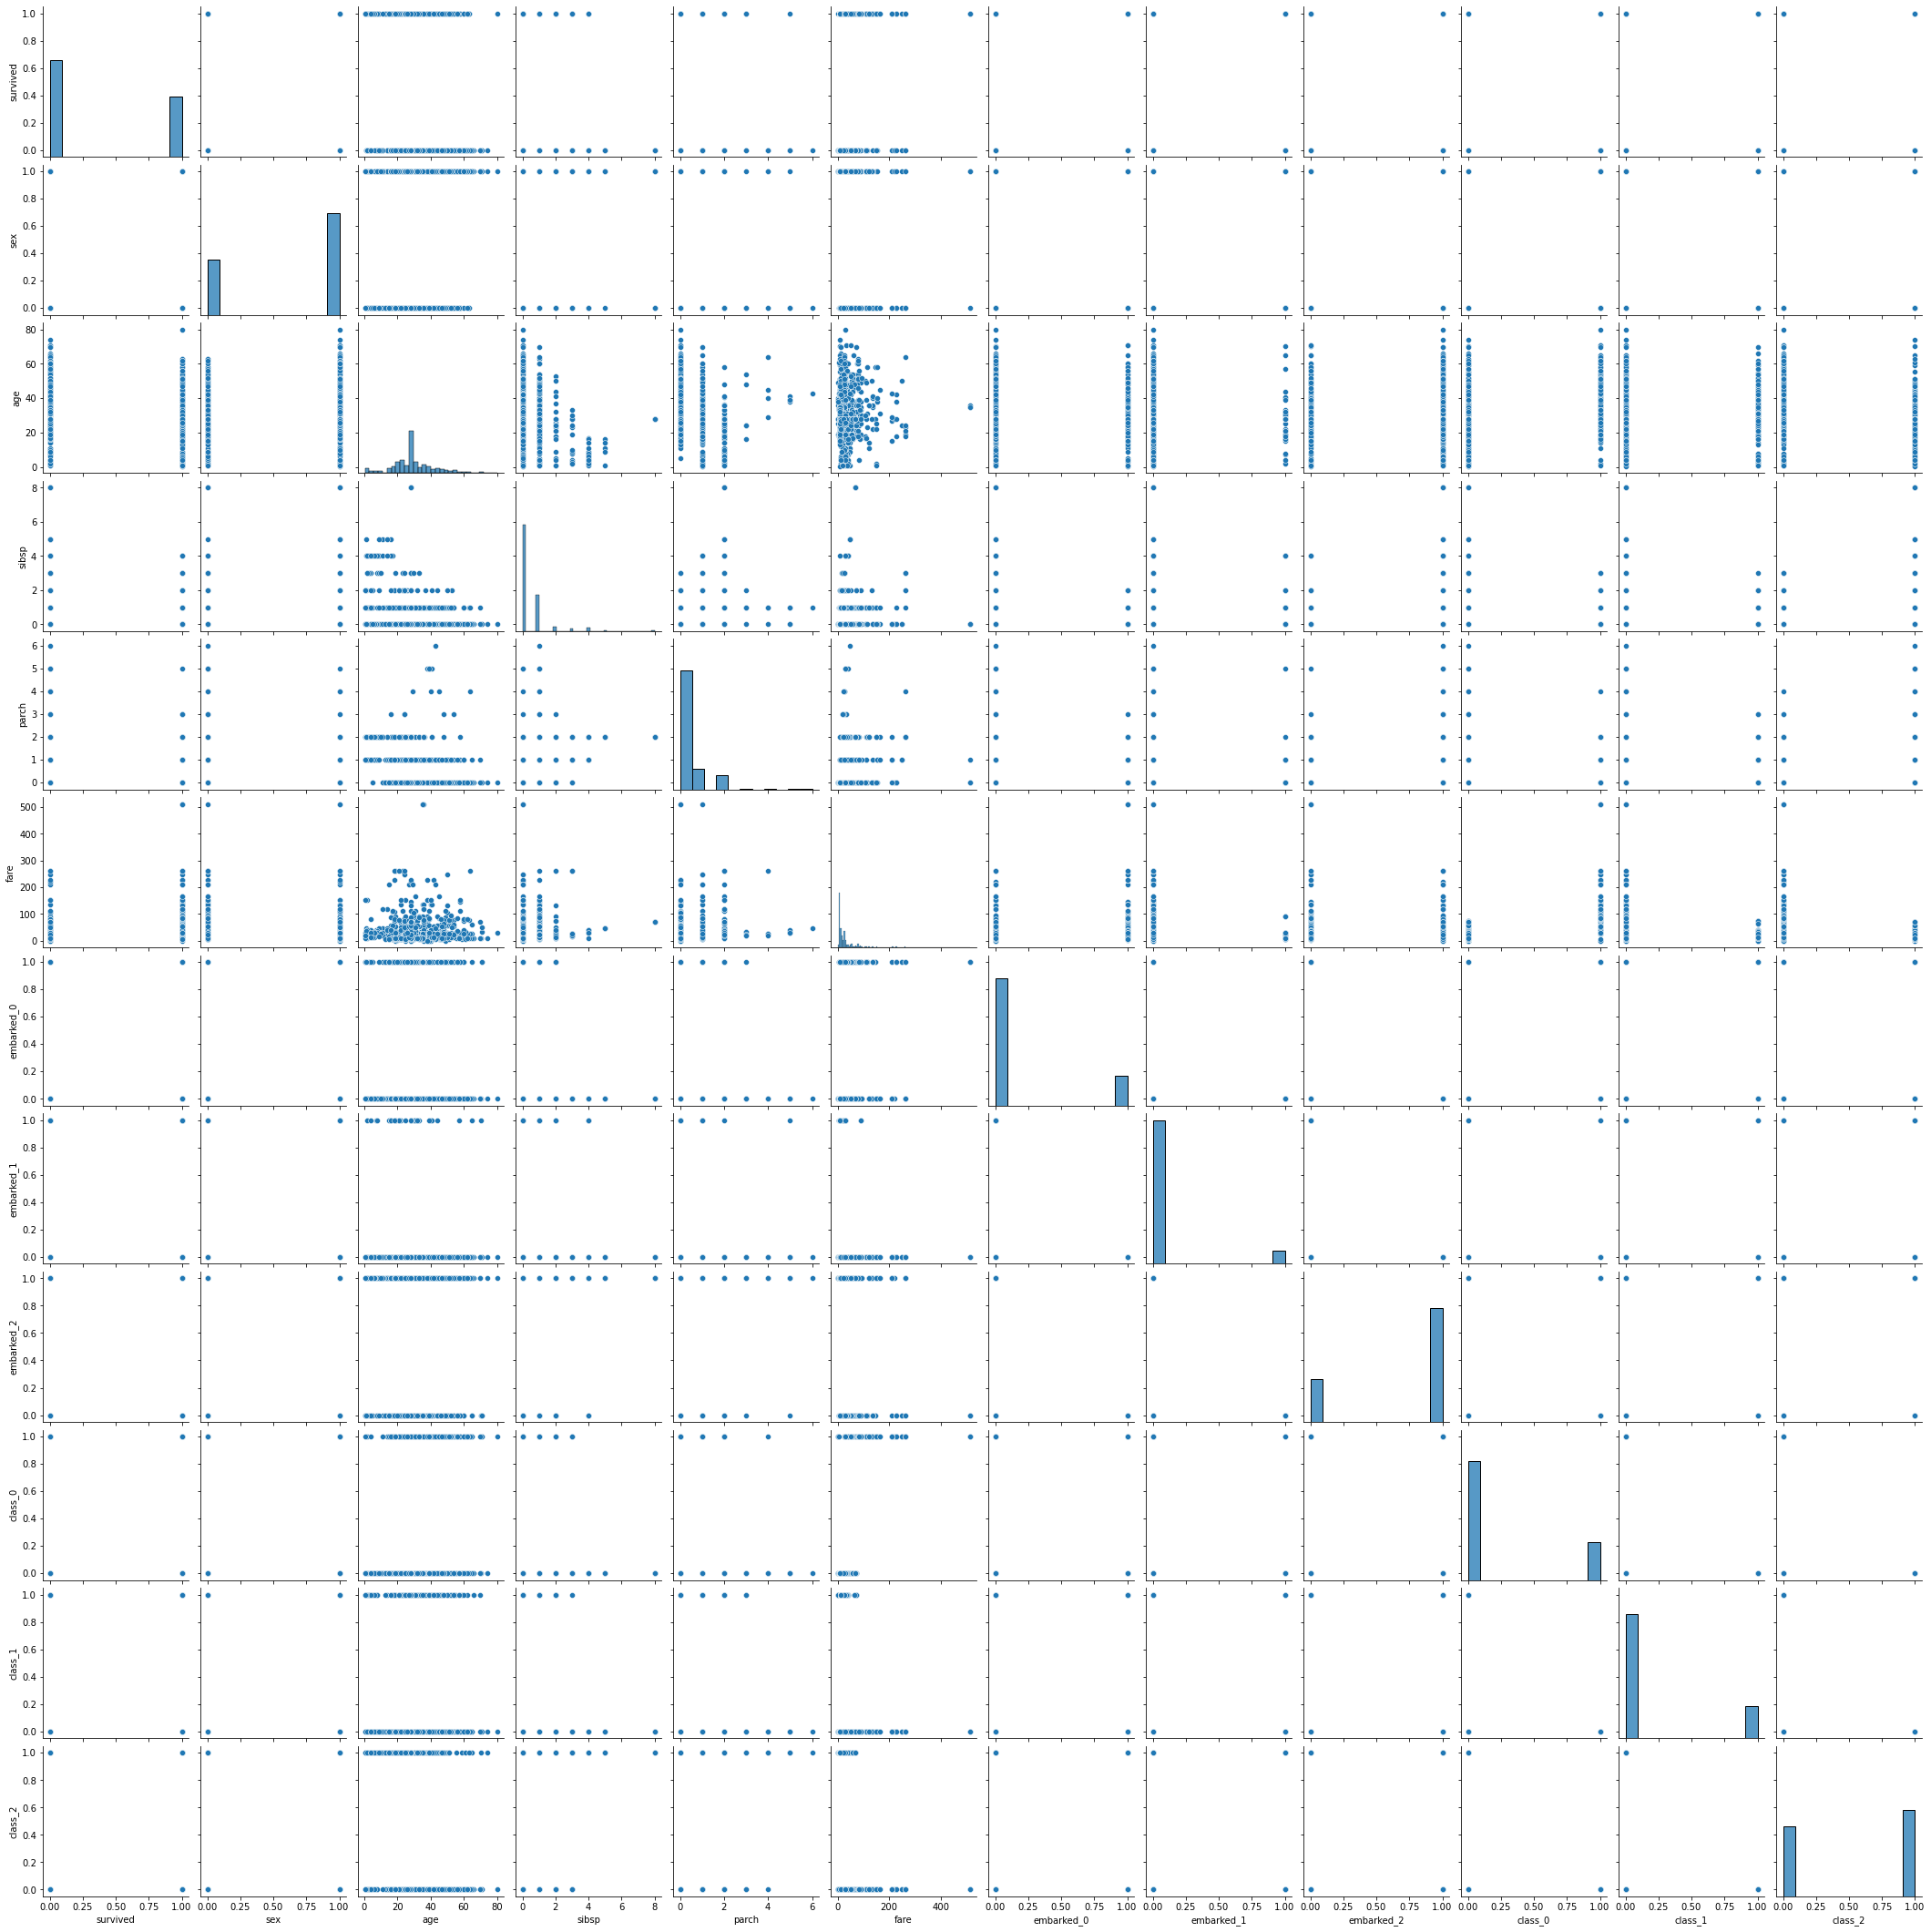

In [38]:
sns.pairplot(data)

In [39]:
# Split the data into dependent and indpenedent variable
y = data['survived'].values
x = data.iloc[ : ,1:].values

In [40]:
x

array([[ 1., 22.,  1., ...,  0.,  0.,  1.],
       [ 0., 38.,  1., ...,  1.,  0.,  0.],
       [ 0., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 1., 32.,  0., ...,  0.,  0.,  1.]])

In [41]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [42]:
# Split the data in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25, random_state = 101)

In [43]:
x_train.shape

(668, 11)

In [44]:
 x_test.shape

(223, 11)

In [45]:
y_train.shape

(668,)

In [46]:
y_test.shape

(223,)

In [47]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [48]:
logit.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_test_pred = logit.predict(x_test)

In [50]:
y_test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [51]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [53]:
print(confusion_matrix(y_test, y_test_pred))

[[111  16]
 [ 34  62]]


In [54]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       127
           1       0.79      0.65      0.71        96

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.76       223
weighted avg       0.78      0.78      0.77       223



In [55]:
# Test Result
print(accuracy_score(y_test, y_test_pred))

0.7757847533632287


In [56]:
# Train Result
y_train_pred = logit.predict(x_train)

In [57]:
print(accuracy_score(y_train, y_train_pred))

0.8143712574850299


In [58]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_test_pred)
logistic_roc_auc

0.7599245406824148

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
display(fpr [ :10])
display(tpr [ :10])
display(threshold [ :10])

array([0.        , 0.12598425, 1.        ])

array([0.        , 0.64583333, 1.        ])

array([2, 1, 0], dtype=int64)

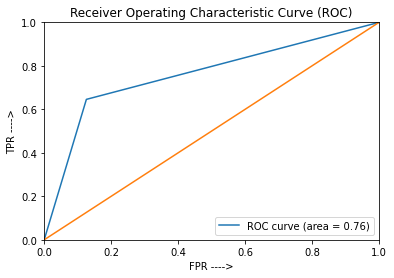

In [60]:
# Plotting AUC and ROC

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0,1], [0,1])
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# K- Fold Method (Cross Validation Approach)

In [61]:
from sklearn.model_selection import cross_val_score
accuracy_training = cross_val_score(logit, x_train, y_train, cv=10)
accuracy_test = cross_val_score(logit, x_test, y_test, cv=10)

In [62]:
print(accuracy_training)
print('$'*100)
print(accuracy_test)


[0.85074627 0.79104478 0.88059701 0.70149254 0.88059701 0.71641791
 0.82089552 0.82089552 0.78787879 0.83333333]
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
[0.82608696 0.91304348 0.73913043 0.72727273 0.72727273 0.90909091
 0.72727273 0.86363636 0.72727273 0.54545455]


In [68]:
print( 'Training accuracy:-',accuracy_training[2])
print( 'Test accuracy:-',accuracy_test[1])

Training accuracy:- 0.8805970149253731
Test accuracy:- 0.9130434782608695


# Decision Tree with Classification Problem- Titanic dataset

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt_g = DecisionTreeClassifier(criterion='gini')
dt_e = DecisionTreeClassifier(criterion='entropy')

In [71]:
dt_g.fit(x_train,y_train)
dt_e.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [72]:
y_predict_train_dt_g = dt_g.predict(x_train)
y_predict_test_dt_g = dt_g.predict(x_test)

In [73]:
y_predict_train_dt_e = dt_g.predict(x_train)
y_predict_test_dt_e = dt_g.predict(x_test)

In [74]:
print(accuracy_score(y_train, y_predict_train_dt_g))
print(accuracy_score(y_test, y_predict_test_dt_g))

0.9820359281437125
0.7802690582959642


In [75]:
print(accuracy_score(y_train, y_predict_train_dt_e))
print(accuracy_score(y_test, y_predict_test_dt_e))

0.9820359281437125
0.7802690582959642


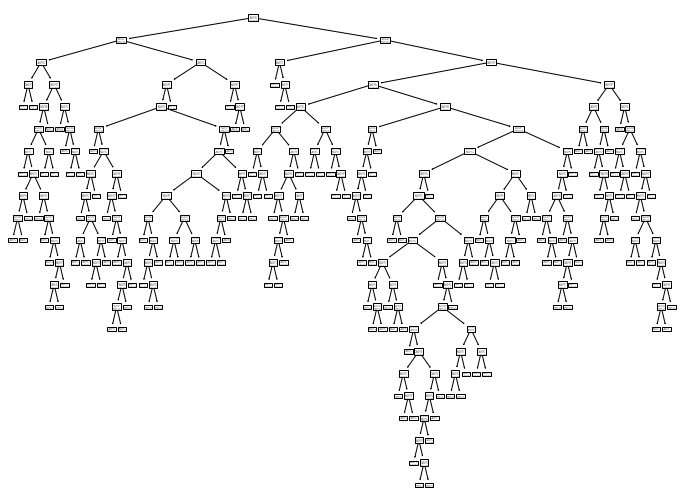

In [76]:
from sklearn.tree import plot_tree
plt.figure(figsize= (12,9))
plot_tree(dt_g)
plt.show()